In [49]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Project Data
data_one = pd.read_csv('/workspaces/codespaces-jupyter/Gen AI Project/Construction_Data_PM_Forms_All_Projects.csv')
# Task Data
data_two = pd.read_csv('/workspaces/codespaces-jupyter/Gen AI Project/Construction_Data_PM_Tasks_All_Projects.csv')

In [50]:

# 1. Report the total number of tasks that are overdue. 

num_overdue_projects = data_one['OverDue'].sum()
num_overdue_tasks = data_two['OverDue'].sum()

print("Number of overdue projects in data set one:", num_overdue_projects)
print("Number of overdue tasks in data set two:", num_overdue_tasks)

Number of overdue projects in data set one: 0
Number of overdue tasks in data set two: 858


In [51]:
#2. Report the Total Number of Open and Closed Tasks by Each Task Group. 
# Groups the data columns together by Task Group and Status, combines each of the projects 
# that had the same status by department, and then prints the results
grouped_data = data_two.groupby(['Task Group', 'Status']).size()
print(grouped_data)

Task Group       Status                       
Design Team      3rd Party Inspection - Closed       1
                 3rd Party Sign Off - Closed       678
                 Closed                             49
                 JPC Sign Off                      200
                 Open / Ongoing Works              181
                 Rejected / Action Required         12
                 Works Complete / Resolved          18
Quality          Closed                             80
                 Closed JPC Reviewed                69
                 JPC Inspected                      15
                 JPC Sign Off / Closed             446
                 Open                                1
                 Open / Ongoing Works              191
                 Rejected / Action Required         88
                 Works Complete / Resolved          41
Safety           Closed                           4954
                 Complete                           30
                 E

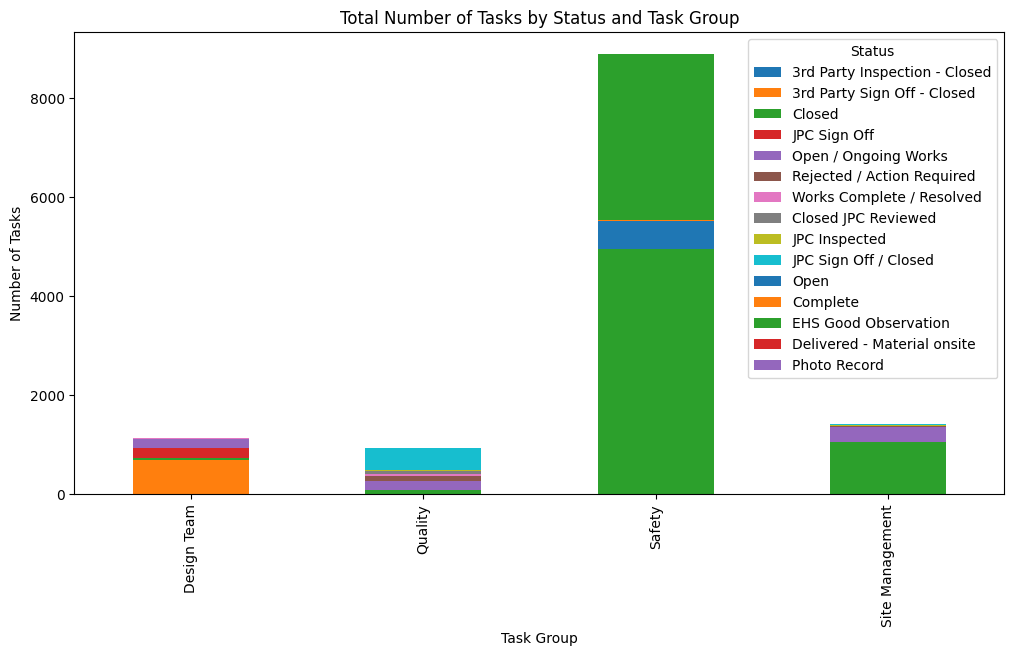

In [52]:
# 3. Create a bar chart of the total number of open and closed tasks by each Task Group 
grouped_data = grouped_data.unstack()

# Create a bar chart of the reshaped data
grouped_data.plot(kind='bar', stacked = 'true', figsize=(12, 6))

# X and Y labels and Chart Title Label 
plt.xlabel('Task Group')  # This labels the x-axis
plt.ylabel('Number of Tasks')  # This labels the y-axis
plt.title('Total Number of Tasks by Status and Task Group')

# Shows the bar chart 
plt.show()

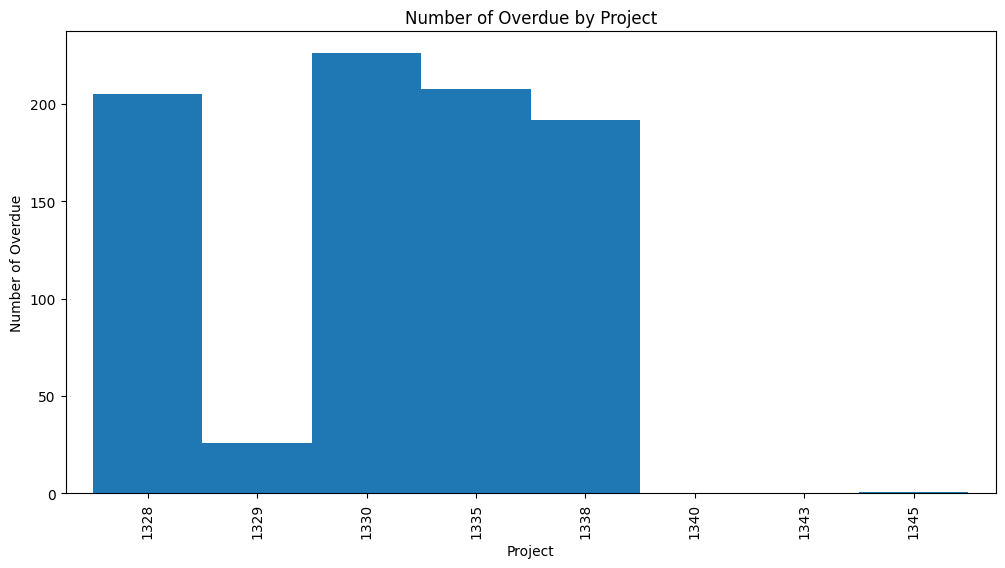

In [61]:
# 4. Create a bar chart of the total number of overdue tasks by project. 
#overdue_series_2 = pd.Series([num_overdue_tasks])

project_grouped = data_two.groupby('project')['OverDue'].sum()
project_grouped.plot(kind='bar', figsize=(12, 6), width=1)
plt.xlabel('Project')  # This labels the x-axis (the horizontal one)
plt.ylabel('Number of Overdue')  # This labels the y-axis (the vertical one)
plt.title('Number of Overdue by Project')  # This gives our chart a title
plt.show()

project
1328    1.650032
1329    0.209272
1330    1.819060
1335    1.674179
1338    1.545396
1340    0.000000
1343    0.000000
1345    0.008049
Name: OverDue, dtype: float64


Text(0, 0.5, 'Percentage Overdue')

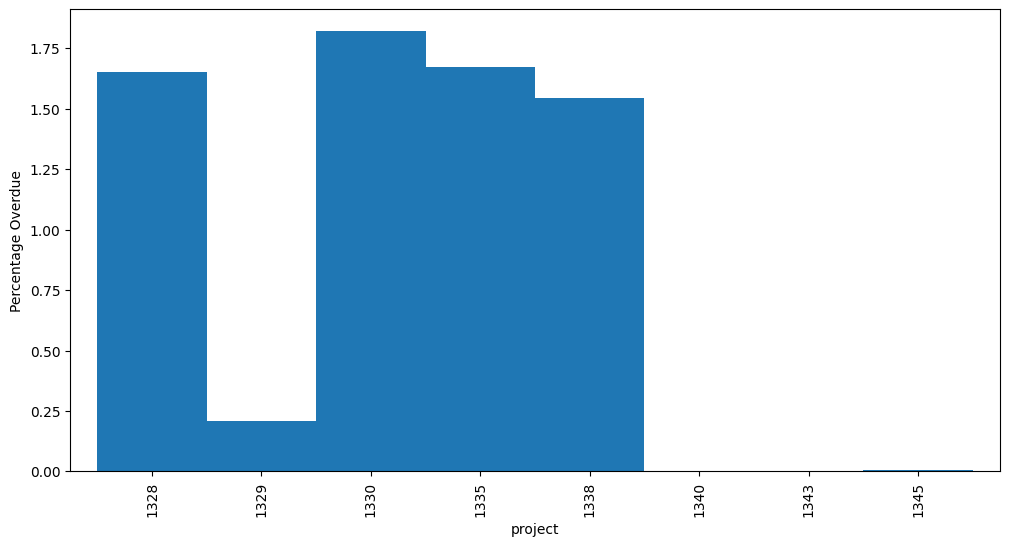

In [70]:
# 5. Create a bar chart of the percentage of overdue tasks by project. (Optional) 
#percentage_overdue = project_grouped['OverDue'].apply(lambda x: (x == 'TRUE').sum() / len(x) * 100)
#percentage_overdue.plot(kind='bar', figsize=(12, 6))
total_responses_overdue = len(data_two[data_two['OverDue'].isin([True,False])])
percentage_overdue = (project_grouped/total_responses_overdue)*100
print(percentage_overdue)

percentage_overdue.plot(kind='bar', figsize=(12, 6), width=1)
plt.ylabel('Percentage Overdue')  # This labels the y-axis (the vertical one)


In [84]:
# 6. Report the mean number of days elapsed since forms were opened by project.(Optional)
import pandas as pd
from datetime import datetime
data_one['Created'] = pd.to_datetime(data_one['Created'],format= '%d/%m/%Y')
data_one['Status Changed'] = pd.to_datetime(data_one['Status Changed'],format= '%d/%m/%Y')
total_days_passed = (data_one['Status Changed']-data_one['Created']).dt.days.sum()
average = total_days_passed/total_responses_overdue
print(f'Total number of days passed across all rows: {total_days_passed}')
print(f'The average number of days elapsed since forms were opened by the project is: {average}')

Total number of days passed across all rows: 280135
The average number of days elapsed since forms were opened by the project is: 22.547891178364456


<Axes: >

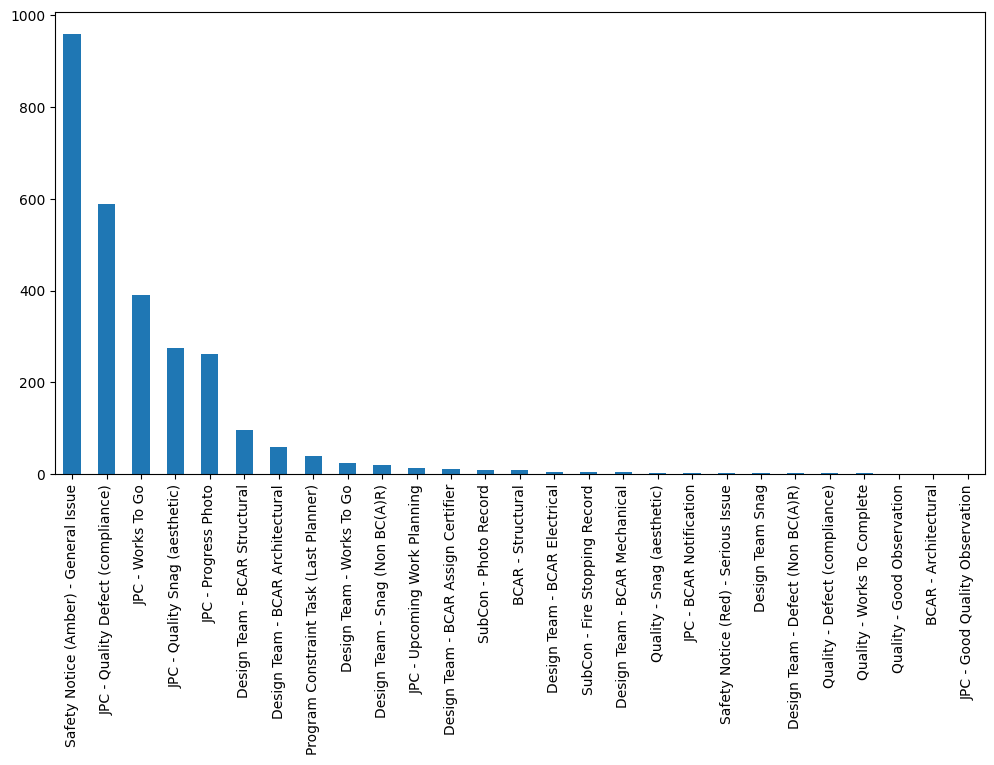

In [56]:
# 7. Create a bar chart of the number of open forms by Type of form. (Optional)
open_data_one = data_one[data_one['Report Forms Status'] == "Open"]
open_dataone_by_type = open_data_one['Type'].value_counts()
open_dataone_by_type.plot(kind='bar', figsize=(12, 6))

open_data_two = data_two[data_two['Report Status'] == "Open"]
open_datatwo_by_type = open_data_two['Type'].value_counts()
open_datatwo_by_type.plot(kind='bar', figsize=(12, 6))


<Axes: xlabel='Created'>

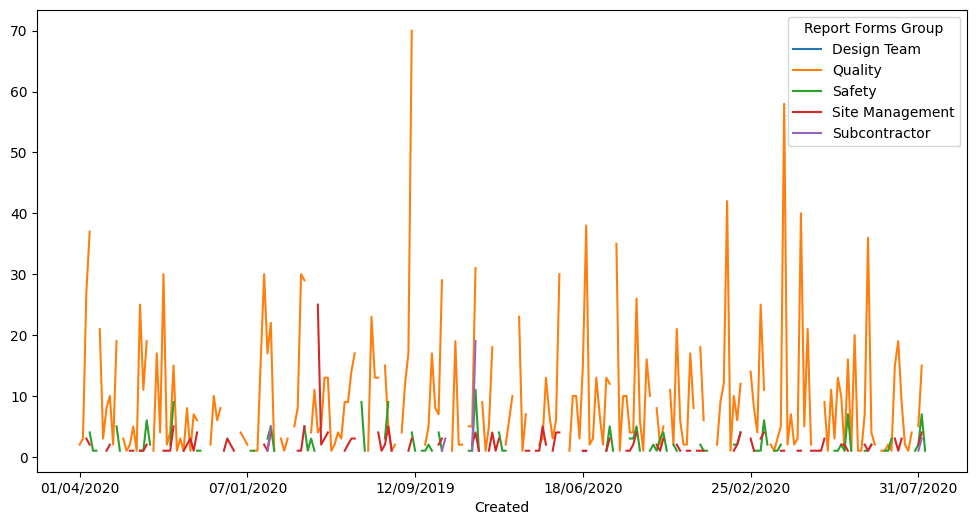

In [57]:
# 8. Create a time series plot of the number of forms opened (which are currently open) by Report Form Group. (Optional)
open_forms_by_date_and_type = open_data_one.groupby(['Created', 'Report Forms Group']).size()
open_forms_by_date_and_type.unstack().plot(kind='line', figsize=(12, 6))

# Are report form groups and task groups the same thing? Do I need to do this for the second data set